# **Principal Component Analysis (PCA) - I**


**objectives:**

In this Jupyter Notebook we will start working with **Principal Component Analysis (PCA)**. The general  goal is twofold:

1. To understand the intuition behind PCA
2. To become familiar with the PCA functionality in scikit-learn.

> - [A] Importing
> - [A] Loading the Iris dataset from scikit-learn
> - [C] Descriptive statistics
> - [D] PCA in 2D: intuition
> - [E] PCA in 2D: scikit-learn
> - [F] Linear algebra in Python
> - [G] Rotating with PCA



---
## **[A] Importing**

We will import several packages:
- We have worked with the first two packages, **`numpy`** and **`pandas`**
- The third subpackage **`matplotlib.pyplot`** is the default plotting package for Python, which we will import under the alias **`plt`**
- The fourth package **`seaborn`** is a package for statistical data visualization, that we will import under the alias **`sns`**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In addition, we will work with **scikit-learn**, a large Python library that contains many different machine learning methods. 

Remember:
> - The package name of scikit-learn is **`sklearn`** and it is **not** scikit-learn!!
> - Because scikit-learn is a large library, it is designed in such a way that you can import smaller parts of it, instead of everything at once

---
## **[B] Loading the Iris dataset from scikit-learn**

We will start working with PCA using the **Iris** dataset. This is a small well-known dataset that can help us understand and visualize PCA.

First, we load in the `datasets` submodule:

In [ ]:
from sklearn import datasets

We will now load the **Iris** data set, which contains information about flowers:

In [ ]:
iris = datasets.load_iris()

# Load X, y, variable labels for the Iris data set
X = iris.data
y = iris.target
variable_labels = iris.feature_names

# Create a dataframe for X
X = pd.DataFrame(X, columns=variable_labels)

In [ ]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


- The 150 records (rows) relate to different flowers
- The 4 variables are about the length and width (in centimeters) of the sepals and petals of these flowers
![sepal_petal](https://www.wpclipart.com/plants/diagrams/plant_parts/petal_sepal_label.png)

---
## [C] Descriptive statistics

Before applying any statistical method to data, your first step should always be to look at some **descriptive statistics** of the dataset.

The **sample mean** of the data **`X`** can be computed using the **`mean`** method of a pandas DataFrame:

In [ ]:
X.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

**Note**: The **difference in scale** between the 4 variables
- Sepal length has a mean of approximately 5.84, while petal width only has a mean of approximately 1.20

The **sample variance** of the data **`X`** can be computed is the **`var`** method of a pandas DataFrame:

In [ ]:
X.var()

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

**Note**: The **difference in variance** between variables
- Petal length has a variance of approximately 3.11, while sepal width only has a variance of approximately 0.19
- The relative magnitude of the variance of a variable is important for the PCA solution!

To learn about the relations between variables we can compute the **covariance matrix** of the data **`X`** using the **`cov`** method of a pandas DataFrame:

In [ ]:
X.cov()  # Hard to interpret, use corr.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


In general, a **correlation matrix** is easier to interpret than a covariance matrix. To compete a **correlation matrix** using pandas, you can use the **`corr`** method of a pandas DataFrame:

In [ ]:
X.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


**Note**: The **very strong correlation** between some of the 4 variables:
> - Petal length and petal width have a correlation of 0.96!
> - In other words, if you know a flower's petal width, you can make a very accurate guess about it's petal length
> - Because this is a correlation, this relation also holds the other way around
> - On the other hand, sepal length and sepal width don't seem to be strongly correlated (-0.12)

For more insight we can use the **`pairplot`** function from the **`seaborn`** plotting package (which we have imported as **`sns`**).

The **`pairplot`** function creates a scatterplot matrix between every variable in the data.
- Each **off-diagonal** subplot corresponds to a scatterplot between two distinct variables
- Each **diagonal** subplot provides a histogram of a single variable

**Note**: Do not use the **`pairplot`** function if you have many different variables (if $P$ is large)

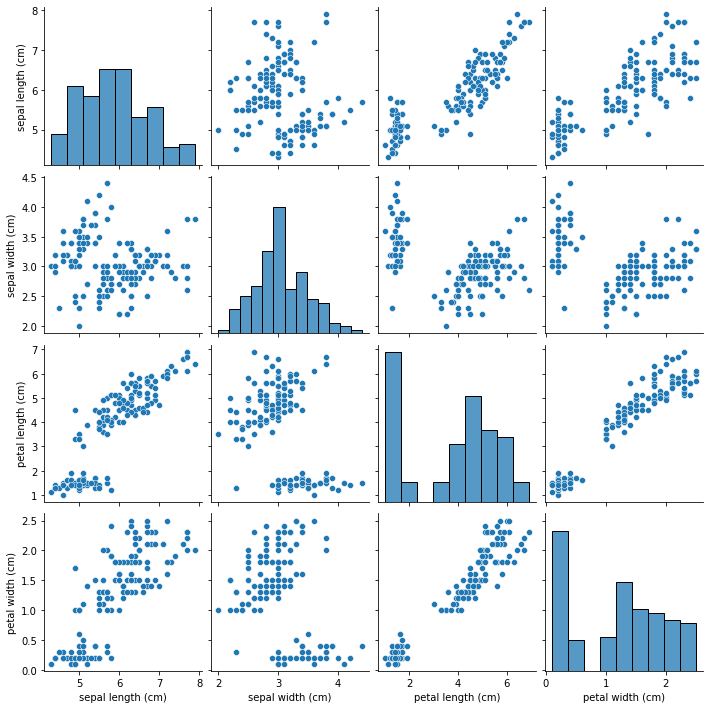

In [ ]:
g = sns.pairplot(data=X)
# we can found correations in the dot graph, but some dots still hard tp identify, so we will use PCA

First, consider the scatterplot between petal width and petal length:
> - These two variables have a very strong positive correlation of about 0.96
> - As a result, the points in their scatterplot are situated **close to a single straight line**

Second, consider the scatterplot between sepal width and sepal length:
> - These two variables have a weak negative correlation of about -0.11
> - As a result, the points in their scatterplot are spread out and **cannot be captured by a single straight line**

---
## **[D] PCA in 2D: intuition**

The reason that we are so focused on the covariances (and correlations) between the variables in the dataset **`X`** is because that is the information in the data PCA focuses on.

In a nutshell, what PCA achieves:
1. PCA creates a **set of new variables**
2. Each of these new variables is a **linear combination** of the $P$ original variables in the dataset **`X`**
3. These linear combinations describe **directions in the data**
4. The directions are **sorted in descending order by the amount of variance they describe**
 - The first direction describes the most variance
 - The second direction describes the second-most variance
 - And so and so forth
5. That is why the directions are also called **principal directions** that describe the **principal components** of the data
6. The original data points $\mathbf{x}_i$ can be described in terms of these **principal components** in place of the $P$ original variables in the dataset **`X`**

Because the **principal components** are sorted, the fundamental idea of PCA is that we can summarize information about all $P$ original variables in the dataset **`X`** by only considering a **small number** of **principal directions**.

Below we will explore the intuition behind PCA in just two dimensions
- The ideas discussed will carry over to datasets with many variables (next lecture)

Because it is easy to visualize two-dimensional records (2D vectors) we will initially focus on just 2 of the 4 variables in the Iris data set, that relate to length:
> - sepal length (first variable)
> - petal length (third variable)

In [ ]:
X_only_length = X.loc[:, ['sepal length (cm)', 'petal length (cm)']]
X_only_length

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


### Scatterplot

We can create a scatterplot for these two variables using the **`scatterplot`** function in **seaborn**:

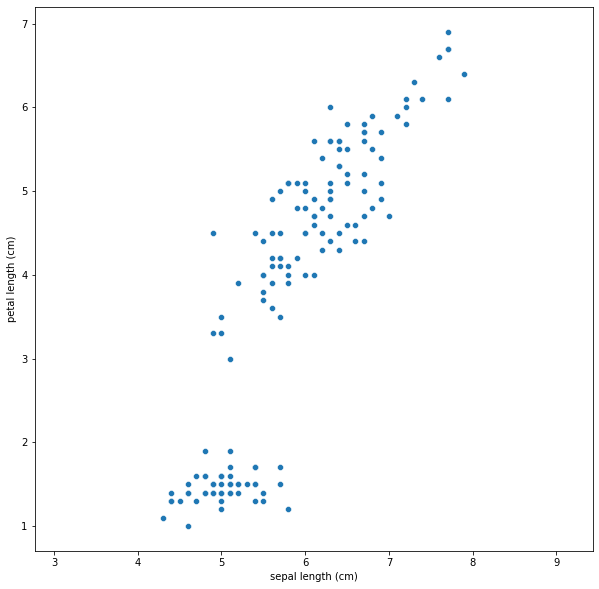

In [ ]:
fig = plt.figure(figsize=[10, 10])

#
# NEW CODE - START
#

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

# Scatterplot between sepal length (x) and petal length (y)
g = sns.scatterplot(
    x=X_only_length.loc[:, 'sepal length (cm)'],
    y=X_only_length.loc[:, 'petal length (cm)'],
)

g.axis('equal')

#
# NEW CODE - STOP
#

plt.show()

By looking at this scatterplot we get a few important take-aways:
- Both variables show some variance
- The variability of the petal length (**vertical axis**) is much larger than the sepal length (**horizontal axis**)
    - Petal length ranges between approximately 1cm and 7cm
    - Sepal length ranges between approximately 4cm and 8cm
We can verify this intuition by looking at the sample variance:

In [ ]:
X_only_length.var()

sepal length (cm)    0.685694
petal length (cm)    3.116278
dtype: float64

This is the idea underlying PCA:
> PCA will find the **coefficients** that describe the direction of maximal variance

---
## **[E] PCA in 2D: scikit-learn**

Before we can use the PCA functionality from **scikit-learn** we need to import it.

The PCA functionality is called **`PCA`** and can be found in the **`decomposition`** subpackage of scikit-learn:

In [ ]:
from sklearn.decomposition import PCA

After importing `PCA` we have to **initialize a PCA object** by calling the imported **`PCA`** function:
- Note: By default we do not have to provide arguments to the `PCA` function

In [ ]:
our_1st_PCA = PCA()

### `fit` method

We can find the **principal directions** (or **principal axes**) for the data matrix by using the **`fit`** method from the PCA object.

A few **important remarks** regarding the `fit` method:
1. The `fit` method automatically **demeans** the data matrix for you, **you do not have to demean the data yourself**. Hence, if you decide to demean the data, it will not change your results
2. After calling the `fit` method some configuration settings will be displayed. These are the (default) settings of the PCA object

In [ ]:
our_1st_PCA.fit(X=X_only_length)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### `components_` attribute
After calling **`fit`** on our PCA object, we can now access the estimated **principal directions** of the data.

Synonyms for a principal direction are:
- **principal axis**
- **eigenvector** (from the StatQuest video)

The PCA object stores the estimated **principal directions** in the **`components_`** attribute
- Note the trailing underscore, the attribute is `components_` and not `components`!


In [ ]:
# Store the principal directions in a variable called directions
directions = our_1st_PCA.components_
directions

array([[ 0.39360585,  0.9192793 ],
       [-0.9192793 ,  0.39360585]])

About **`components_`**:
1. It is an $L \times P$ matrix (stored as a numpy array)
 - $L$ is the number of *requested* principal components
 - $P$ is the number of variables (columns) in **`X`**
 - In scikit-learn, $L = P$ by default. In the next notebook we will learn how to change that value
2. The $k$th **row** describes the **direction** corresponding to the $k$th principal component
 - A direction is described by a set of **coefficients** for each of the $P$ variables
3. In PCA the principal **directions are sorted in descending order of explained variance**
 - Variance here corresponds to the variance in the dataset **`X`**
 - The 1st principal component, corresponding to the 1st row in `components_`, explains the most variance in the data
 - The 2nd principal component, corresponding to the 2nd row in `components_`, explains the second-most variance in the data
 - And so on and so forth (if we have more than 2 components)

Using the above, we can store the principal directions in a pandas DataFrame and label the rows and columns:

In [ ]:
directions = pd.DataFrame(
    our_1st_PCA.components_,
    index=['PC1', 'PC2'],
    columns=X_only_length.columns,
)
directions

,sepal length (cm),petal length (cm)
PC1,0.393606,0.919279
PC2,-0.919279,0.393606


### `components_` interpretation

How do we interpret the numbers in `components_`?

Let's first focus on the 1st principal direction:
- The 1st row in `components_` gives the **coefficients** of the 1st principal direction
- These coefficients describe the **slope** of the **straight line** in the data that **maximizes variance**
- Each principal direction is described by a **unique** combination of coefficients

Remember:
- Earlier in the notebook, we tried to find this direction using intuition.
- Now with PCA, we actually have the **exact solution** for the 1st principal direction.

In the plot below, we visualize the 1st principal direction using two red arrows:

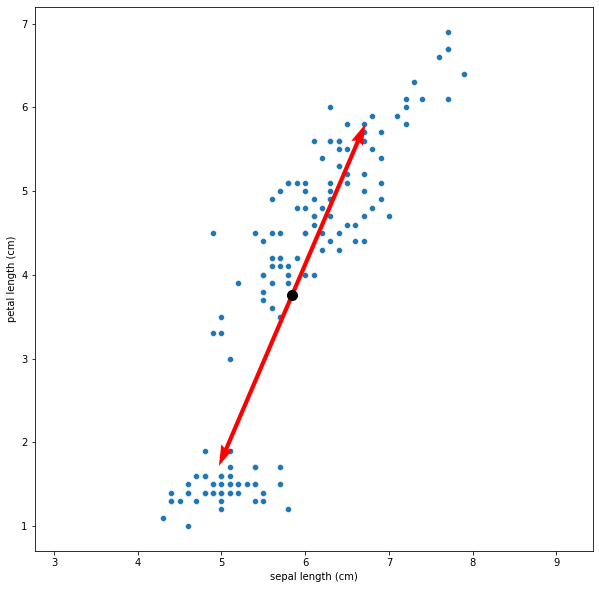

In [ ]:
fig = plt.figure(figsize=[10, 10])

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

# Scatterplot between sepal length (x) and petal length (y)
g = sns.scatterplot(
    x=X_only_length.loc[:, 'sepal length (cm)'],
    y=X_only_length.loc[:, 'petal length (cm)'],
)

g.axis('equal')

#
# NEW CODE - START
#

# Add a black dot that corresponds to the mean of the data
plt.scatter(*X_only_length.mean().values, s=100, c='black', zorder=10)

# Draw the 1st principal direction
# - Remember: This corresponds to the maximal variance in the data!
# - Note: You don't have to know how to draw this
plt.quiver(
    *X_only_length.mean().values,
    *directions.iloc[0],
    scale=3,
    color='r'
)
plt.quiver(
    *X_only_length.mean().values,
    *-directions.iloc[0],
    scale=3,
    color='r',
)

#
# NEW CODE - STOP
#

plt.show()

In the same way, we can visualize the 2nd principal direction using two blue arrows:

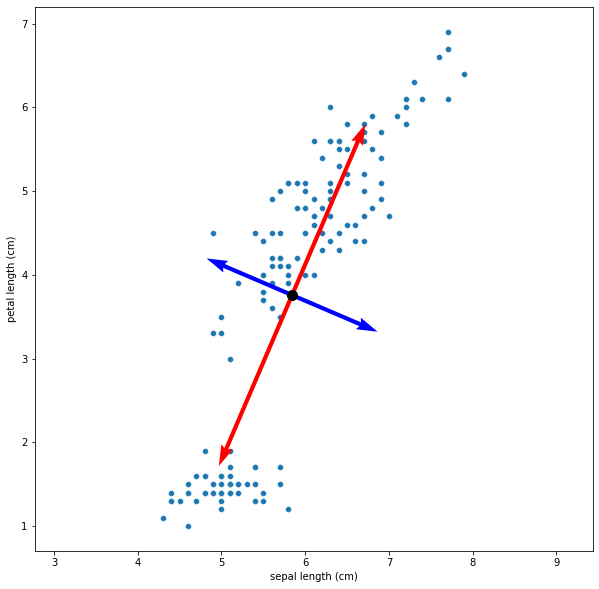

In [ ]:
fig = plt.figure(figsize=[10, 10])

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

# Scatterplot between sepal length (x) and petal length (y)
g = sns.scatterplot(
    x=X_only_length.loc[:, 'sepal length (cm)'],
    y=X_only_length.loc[:, 'petal length (cm)'],
)

g.axis('equal')

# Add a black dot that corresponds to the mean of the data
plt.scatter(*X_only_length.mean().values, s=100, c='black', zorder=10)

# Draw the 1st principal direction
# - Remember: This corresponds to the maximal variance in the data!
# - Note: You don't have to know how to draw this
plt.quiver(
    *X_only_length.mean().values,
    *directions.iloc[0],
    scale=3,
    color='r'
)
plt.quiver(
    *X_only_length.mean().values,
    *-directions.iloc[0],
    scale=3,
    color='r',
)

#
# NEW CODE - START
#

# Draw the 2nd principal direction
# - Note: You don't have to know how to draw this
plt.quiver(
    *X_only_length.mean().values,
    *directions.iloc[1],
    scale=6,
    color='b'
)
plt.quiver(
    *X_only_length.mean().values,
    *-directions.iloc[1],
    scale=6,
    color='b',
)

#
# NEW CODE - STOP
#

plt.show()

Note:
- The principal directions are **perpendicular** (90 degree angle)
- Another way to say this is that the two principal directions are **orthogonal**
- This is not by accident, but by design of PCA

In essence, what the output of PCA gives us is a **new way** to look at our data:
- Instead of interpreting the data in terms of sepal length and sepal width, the original variables in the data, we will interpret the data in terms of the 1st principal direction and the 2nd principal direction
- For this we need to perform a **rotation** 

## [F] Linear algebra in Python



Using **linear algebra** we can create a **rotation** by using a **matrix-matrix multiplication**
- To perform a **matrix-matrix multiplication** in Python we use the **`@`** operator
- To **transpose** a **matrix** in Python we use the **`.T`** attribute on the matrix
 - Note: Transposing works on both a numpy array and a pandas DataFrame


Let's try this with a $2 \times 2$ matrix `A`:

In [ ]:
A = np.array([
    [1, 2],
    [3, 4]
])
A

array([[1, 2],
       [3, 4]])

The **transpose** of `A` is given by `A.T`:

In [ ]:
A.T

array([[1, 3],
       [2, 4]])

The **matrix multiplication** between `A` and `A.T`:

In [ ]:
A @ A.T

array([[ 5, 11],
       [11, 25]])

Note: This is **not** the same as the matrix multiplication between `A.T` and `A`, **order matters** when multiplying matrices:

In [ ]:
A.T @ A

array([[10, 14],
       [14, 20]])

## [G] Rotating with PCA

### Rotating the principal directions

By **rotating** the principal directions we can have that:
- The 1st principal component becomes equal to the x-axis
- The 2nd principal component becomes equal to the y-axis

To rotate the principal directions using linear algebra we need to multiply them with a matrix, so we need to perform a **matrix-matrix multiplication**:
- The first matrix is the matrix with the **principal directions**: the **`directions`** variable
- The second matrix is the matrix with the **transpose** of the principal directions: the **`directions.T`** variable

So, to perform the rotation we have:

In [ ]:
rotated_directions = pd.DataFrame(
    directions.values @ directions.values.T,
    index=['PC1', 'PC2'],
    columns=['X', 'Y'],
)
pd.DataFrame(rotated_directions).round(4)

,X,Y
PC1,1.0,0.0
PC2,0.0,1.0


We can now plot these rotated directions using the arrows as before:
- Note, we redefine the origin (the point (0, 0)) as the intersection between the two axes

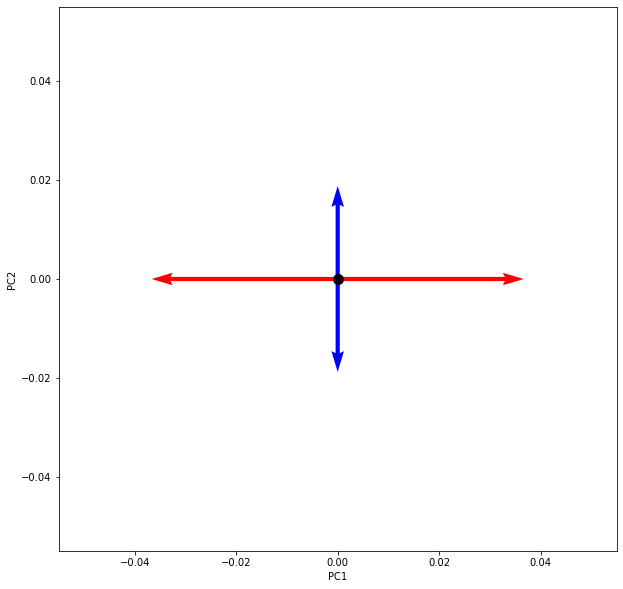

In [ ]:
fig = plt.figure(figsize=[10, 10])

plt.xlabel('PC1')
plt.ylabel('PC2')

# Add a black dot that corresponds to the mean of the data
plt.scatter(*[0, 0], s=100, c='black', zorder=10)

# Draw the 1st principal direction
# - Remember: This corresponds to the maximal variance in the data!
# - Note: You don't have to know how to draw this
plt.quiver(
    *[0, 0],
    *rotated_directions.iloc[0],
    scale=3,
    color='r'
)
plt.quiver(
    *[0, 0],
    *-rotated_directions.iloc[0],
    scale=3,
    color='r',
)

# Draw the 2nd principal direction
# - Note: You don't have to know how to draw this
plt.quiver(
    *[0, 0],
    *rotated_directions.iloc[1],
    scale=6,
    color='b'
)
plt.quiver(
    *[0, 0],
    *-rotated_directions.iloc[1],
    scale=6,
    color='b',
)

plt.show()

### Rotating the data into principal component scores

The next step is to rotate the data, such that the data is not described in terms of the original $P$ variables, but in terms of scores on the $L$ principal components.

This involves two steps:
1. **Demeaning the data**, as we want the data to be centered around the origin (0, 0)
2. Performing a matrix-matrix multiplication between the **demeaned data matrix** and the **transposed principal directions**

In [ ]:
rotated_X_only_length = pd.DataFrame(
    (X_only_length - X_only_length.mean()) @ directions.T
)

rotated_X_only_length.round(4)

,PC1,PC2
0,-2.4602,-0.2448
1,-2.5390,-0.0609
2,-2.7096,0.0836
3,-2.5651,0.2542
4,-2.4996,-0.1529
...,...,...
145,1.6628,-0.2199
146,1.3215,0.0691
147,1.5841,-0.0361
148,1.6498,0.3184


The 10th row (for example) of `rotated_X_only_length` now contains the scores of the 11th observation on the two principal components:

In [ ]:
rotated_X_only_length.iloc[10]

PC1   -2.250231
PC2   -0.481215
Name: 10, dtype: float64

Which is very different from the observations for the two variables:

In [ ]:
X_only_length.iloc[10]

sepal length (cm)    5.4
petal length (cm)    1.5
Name: 10, dtype: float64

We can plot the `rotated_X_only_length` values:

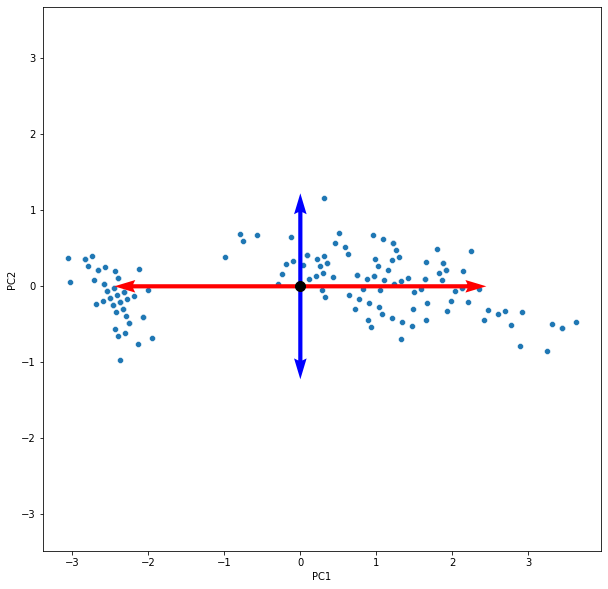

In [ ]:
fig = plt.figure(figsize=[10, 10])

plt.xlabel('PC1')
plt.ylabel('PC2')

# Scatterplot between sepal length (x) and petal length (y)
g = sns.scatterplot(
    x=rotated_X_only_length.loc[:, 'PC1'],
    y=rotated_X_only_length.loc[:, 'PC2'],
)
g.axis('equal')

# Add a black dot that corresponds to the mean of the data
plt.scatter(*[0, 0], s=100, c='black', zorder=10)

# Draw the 1st principal direction
# - Remember: This corresponds to the maximal variance in the data!
# - Note: You don't have to know how to draw this
plt.quiver(
    *[0, 0],
    *rotated_directions.iloc[0],
    scale=3,
    color='r'
)
plt.quiver(
    *[0, 0],
    *-rotated_directions.iloc[0],
    scale=3,
    color='r',
)

# Draw the 2nd principal direction
# - Note: You don't have to know how to draw this
plt.quiver(
    *[0, 0],
    *rotated_directions.iloc[1],
    scale=6,
    color='b'
)
plt.quiver(
    *[0, 0],
    *-rotated_directions.iloc[1],
    scale=6,
    color='b',
)

plt.show()

Compare that against the plot with petal length and sepal length on the axes:

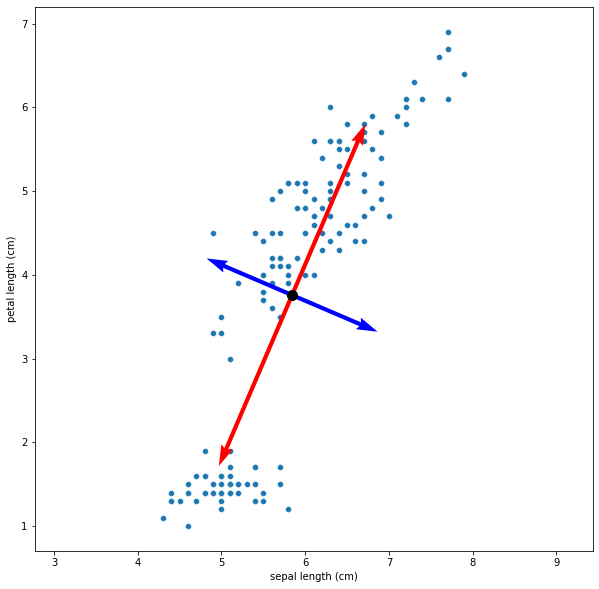

In [ ]:
fig = plt.figure(figsize=[10, 10])

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

# Scatterplot between sepal length (x) and petal length (y)
g = sns.scatterplot(
    x=X_only_length.loc[:, 'sepal length (cm)'],
    y=X_only_length.loc[:, 'petal length (cm)'],
)

g.axis('equal')

# Add a black dot that corresponds to the mean of the data
plt.scatter(*X_only_length.mean().values, s=100, c='black', zorder=10)

# Draw the 1st principal direction
# - Remember: This corresponds to the maximal variance in the data!
# - Note: You don't have to know how to draw this
plt.quiver(
    *X_only_length.mean().values,
    *directions.iloc[0],
    scale=3,
    color='r'
)
plt.quiver(
    *X_only_length.mean().values,
    *-directions.iloc[0],
    scale=3,
    color='r',
)

#
# NEW CODE - START
#

# Draw the 2nd principal direction
# - Note: You don't have to know how to draw this
plt.quiver(
    *X_only_length.mean().values,
    *directions.iloc[1],
    scale=6,
    color='b'
)
plt.quiver(
    *X_only_length.mean().values,
    *-directions.iloc[1],
    scale=6,
    color='b',
)

#
# NEW CODE - STOP
#

plt.show()

Intrinsically, the **data did not change**
- Instead, we rotated the data into a new **coordinate system**, described by the **principal directions**

### Rotating using the `transform` method

Instead of manually demeaning the data and performing the matrix multiplication, we can also use the **`transform`** method of the PCA object to rotate the data into principal component scores:

In [ ]:
rotated_using_transform_method = pd.DataFrame(
    our_1st_PCA.transform(X_only_length),
    columns=['PC1', 'PC2'],
)
rotated_using_transform_method

,PC1,PC2
0,-2.460241,-0.244792
1,-2.538962,-0.060936
2,-2.709611,0.083559
3,-2.565116,0.254209
4,-2.499602,-0.152864
...,...,...
145,1.662790,-0.219936
146,1.321492,0.069054
147,1.584069,-0.036080
148,1.649843,0.318425


We can verify that this is the same as our own transformation:

In [ ]:
np.allclose(rotated_using_transform_method, rotated_X_only_length)

True

# Summary

In this notebook we have made a start with PCA. The focus was on:
- Building intuition
- Using scikit-learn to find the PCA solution

In the next notebook we will continue with PCA and make it more applied:
- Use PCA to effectively summarize data into a small number of principal components
- Provide an interpretation for the principal directions in terms of the original variables
- More visualization of the data in the principal component coordinate system